In [2]:
import pandas as pd
text_ana= pd.read_excel('text_analysis_twitter_sample.xlsx')
text_ana=text_ana.drop(['Unnamed: 0'],axis=1)

In [3]:
print(text_ana.head())

    index                  id      screen_name                       time  \
0   49374  890587249372524544          auctnr1  2017-07-27T10:58:41-04:00   
1   83246  899354463055618048    SenatorTester  2017-08-20T15:36:27-04:00   
2  100988  903272105738985472     KeithRothfus  2017-08-31T11:03:46-04:00   
3  193395  921001114409021440  HASCRepublicans  2017-10-19T09:12:31-04:00   
4   12662  884911451449774080    SteveKnight25  2017-07-11T19:05:05-04:00   

                                                link  \
0  https://www.twitter.com/Reuters/statuses/89058...   
1  https://www.twitter.com/SenatorTester/statuses...   
2  https://www.twitter.com/KeithRothfus/statuses/...   
3  https://www.twitter.com/HASCRepublicans/status...   
4  https://www.twitter.com/SteveKnight25/statuses...   

                                                text              source  
0  RT @Reuters MORE: Top U.S. general says, given...  Twitter for iPhone  
1  T-minus 2 days until our first-ever Last Best .

In [4]:
import re

def preprocess_text(x):
    x=x.lower()
    x=re.sub(r'http\S+','',x)
    stop_words=['to','the','of','in','for','and','with']
    x=' '.join([word for word in x.split(' ') if word not in stop_words])
    return x
text_ana['text']=text_ana['text'].apply(preprocess_text)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
X=vectorizer.fit_transform(text_ana['text'])
X.shape

(500, 3569)

In [6]:
#词频统计
feature_words=vectorizer.get_feature_names_out()
word_freq=dict(zip(feature_words,X.sum(axis=0).A1))
sorted(word_freq.items(),key=lambda x:x[1],reverse=True)

[('rt', 135),
 ('on', 130),
 ('is', 108),
 ('amp', 96),
 ('our', 91),
 ('you', 88),
 ('we', 82),
 ('this', 74),
 ('at', 71),
 ('it', 62),
 ('qt', 62),
 ('my', 53),
 ('be', 49),
 ('that', 49),
 ('are', 48),
 ('from', 46),
 ('as', 43),
 ('have', 42),
 ('by', 41),
 ('trump', 41),
 ('tax', 40),
 ('who', 40),
 ('today', 38),
 ('will', 37),
 ('not', 36),
 ('here', 32),
 ('all', 30),
 ('your', 30),
 ('an', 28),
 ('new', 28),
 ('bill', 27),
 ('thank', 27),
 ('their', 27),
 ('what', 27),
 ('about', 26),
 ('more', 26),
 ('us', 26),
 ('get', 25),
 ('has', 25),
 ('he', 25),
 ('must', 25),
 ('need', 25),
 ('great', 23),
 ('help', 23),
 ('his', 23),
 ('house', 23),
 ('people', 23),
 ('work', 23),
 ('health', 22),
 ('they', 22),
 ('was', 22),
 ('can', 21),
 ('families', 21),
 ('just', 21),
 ('up', 21),
 ('americans', 20),
 ('congress', 20),
 ('day', 20),
 ('one', 20),
 ('support', 20),
 ('act', 19),
 ('if', 19),
 ('live', 19),
 ('now', 19),
 ('care', 18),
 ('no', 18),
 ('them', 18),
 ('working', 18),

In [7]:
!pip install wordcloud

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


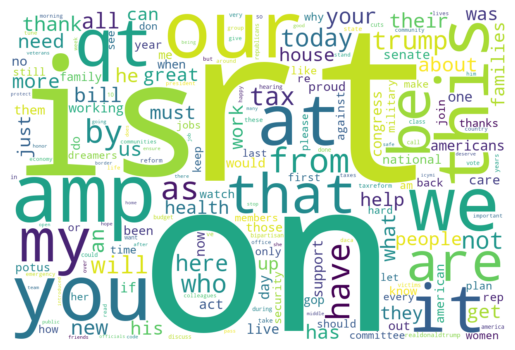

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    width=1200,
    height=800,
    max_words=200,
   # max_font_size=100,
    colormap="viridis",
    background_color='white'
)

wc.generate_from_frequencies(word_freq)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()